### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. 

Two class of problems:

- regression problem
- classification problem

#### Regression problems:

#### Linear Regression:

- single (single input variable) or multiple (multiple input variables)
- with or without interactions in the input variables
- in all cases try to minimize the loss (defined by the loss function)
- nonlinear implementation can be achived by taking powers of input variables into account, but with large data it is increasingly difficult to handle

#### Nonlinear Methods:

- Decision Tree Regression
- Random Forest Regression
- KNN Regression
- SVM Regression
- XGBoost Regression

- These work on the exact same proinciples as described below, although the estimation of the utput is different from classification. For a decision tree in particular: the training examples are being split in a way such that the sum of squared residuals is minimized. Then the output is predicted based on the average of all of the examples that fall into the leaf to which the new sample is assigned.
- for KNN similarly either the average value of median of the neighbors is taken as the predicted output.
- similarly for SVM and XGBoost, occurences are assigned to classes than the average value in the class is used for prediction.

#### Classification problems:

The target vaeiable needs to be assigned to specific classes (labels), which might be binary (0, 1 or yes - no) or multilabel (to which of the 42 fish species does the target belong to)

We used so far:

- Logistic Regression
- KNN Classification
- SVM Classification
- Decision Trees
- Random Forest Classification
- XGBoost Classification

#### 1, Logistic Regression:

Works for binary classification problems. Outputs are probabilities of the two possible labels, the label is assigned to each sample based on a streshold. So, if the streshold is 0.5 (default), the label is assigned based on the the higher probability as one would expect, but the streshold can be varied in order to construct a ROC-AUC curve to examine the robustness of the classification.

- C parameter
- penalty (usually L1 or L2)

#### 2, KNN Classification

KNN (k nearest neighbors) is determining which data points are the nearest to our point of interest when represented in (usually) an Eucledian space. The user sets the value of k such that the error on the test data set shall be minimal or close to minimal. One application is classification of new data, which is done based on what class the k nearest neighbors do belong to. The new sample will be classified as belonging to the majority class of it's k nearest neighbors.

- parameters: n_neighbors. Choose an odd value to avoid ties. Can be optimized, but ususally the square root of the total number of samples or below is a good starting point.

#### 3, SVM Classification

- the algoritm creates a line (if in 2 dim) or hyperplane (in higher dim) which separates the data into classes. Distance (called margin here) between the plane and closest points (called support vectors) is maximized.
- when data is not linearly separable, we can try to add a higher dimension in which it would be (this might be clear when staring off in 2D, but I doubt there is an obvious way to do this when starting already in a higher dimension)

Hyperparameters:
- C: smaller value, smoother boundary, larger value, more points classified correctly
- gamma: ig high, the boundary will depend only on the points that are close to it, if low, further living points have an effect, too

#### 4, Decision tree

- tree structure
- each node denotes a test on an attribute
- each branch represents an outcome of the test
- each leaf node (terminal node) corresponds to a class label
- is constructed by splitting the source set into subsets based on an attribute value test 
- repeated on each derived subset in a recursive manner
- completed when splitting no longer adds value to the predictions

Hyperparameters:

- as listed for random forest except for number of trees that does not apply here
- min_impuroty_decrease: required minimal gain in order to proceed with a split

#### 5, Random Forest Classification

Parameters:
- number of trees: Number of trees denote the number of decision trees we populate the forest with
- max_depth: Maximal depth denotes the maximal allowed distance (in number of splits) from the top to bottom of each tree.
- min_samples_split: Represents the minimum number of samples required to split an internal node. This can vary between at least one sample at each node to all of the samples at each node. Increasing this parameter each tree in the forest becomes more constrained as it has to consider more samples at each node.
- min_samples_leaf: Denotes the number of samples that must be present at least in every leaf of the tree.
- max_leaf_nodes: Sets the maximal allowed number of terminal nodes (summed for all branches of the tree).


#### 6, XGBoost Classification



- ensemble method
- decision tree based
- uses gradient boosting

hyperparameters:
- learning_rate: speed of fitting the residual errors
- max_depth: how deep the nodes should go
- subsample: fraction of sample used to train the model

### 2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

#### KMeans

- KMeans remembers the mean of each cluster (the centroids)
- new samples are assigned to clusters which mean (centroid) is the closest
- centroids are set randomly at the beginning and recalculated throughout the process
- we specify the number of clusters we would love to have
- we decide on the number of clusters either using the elbow method or the silhuette score or ideally both (see Q4)

#### Hierarchical clustering

- every row starts off as a separate cluster
- at each step the two closest clusters are merged, untill all are merged
- plot the tree
- dendrograms show max distances between merging clusters (the height is the distance)

- it is also possible to extract clusters at intermediate stages of hierarchical clustering
- it is specified by chosing a height on the dendrogram, which encodes distance between clusters
- we can specify the height (distance) at which the hierarchical clustering should stop merging neighboring clusters
- the distance itself is specified by the linkage method. Complete linkage means distance is maximal distance between their samples (method = 'complete')
- the cluster labels in the intermediate stages can be used in further computations (e.g. crosstabulations)

#### t-SNE

- creates a 2D map of the dataset
- map approximately preserves nearness of samples
- we do not give information on classes to t-SNE

### 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/balazs.varga/Documents/BALAZS/USE/REPOS/ecommerce_data.csv',encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26 AM,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26 AM,3.39,17850,United Kingdom


In [2]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (541909, 8)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum() # null values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
columns = df.columns.values.tolist()

for column in columns:
    print('______________________________________________________ \n')
    print(df[column].value_counts())

______________________________________________________ 

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64
______________________________________________________ 

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
______________________________________________________ 

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRA

In [6]:
df.duplicated().sum()

5268

There are certain irregularities in this dataset:

- Description has missing values, those are not useful, we can remove those
- Similar conclusion for customer IDs (if we try to do customer segmentation)
- Duplicates need to be removed, too


In [7]:
df.drop_duplicates(inplace = True)
df = df.dropna(how='any', axis=0)

print(df.shape)

(401604, 8)


We saw earlier that there are items with negative quantity. Wilt all likelyhood these are cancellations. Let's examine these more closely:

In [8]:
cancellations = df[df['Quantity'] < 0][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice','InvoiceDate']]
cancellations

,InvoiceNo,CustomerID,Quantity,StockCode,Description,UnitPrice,InvoiceDate
141,C536379,14527,-1,D,Discount,27.50,2010-12-01 09:41:00
154,C536383,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65,2010-12-01 09:49:00
235,C536391,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65,2010-12-01 10:24:00
236,C536391,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29,2010-12-01 10:24:00
237,C536391,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29,2010-12-01 10:24:00
...,...,...,...,...,...,...,...
540449,C581490,14397,-11,23144,ZINC T-LIGHT HOLDER STARS SMALL,0.83,2011-12-09 09:57:00
541541,C581499,15498,-1,M,Manual,224.69,2011-12-09 10:28:00
541715,C581568,15311,-5,21258,VICTORIAN SEWING BOX LARGE,10.95,2011-12-09 11:57:00
541716,C581569,17315,-1,84978,HANGING HEART JAR T-LIGHT HOLDER,1.25,2011-12-09 11:58:00


Indeed, C in the invoice number most likely means cancellations. We need to delete these, but before we do we need to find corresponding orders that are being cancelled.

In [9]:
tocompare = cancellations.drop(columns = ['InvoiceNo', 'InvoiceDate'])
tocompare['Quantity'] = -cancellations['Quantity']

tocompare.head(2)

,CustomerID,Quantity,StockCode,Description,UnitPrice
141,14527,1,D,Discount,27.50
154,15311,1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65


In [10]:
keys = list(tocompare.columns.values)
i1 = df.set_index(keys).index
i2 = tocompare.set_index(keys).index
counterparts = df[i1.isin(i2)]
counterparts

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
55,536373,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01 09:02:00,1.06,17850,United Kingdom
57,536373,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2,2010-12-01 09:02:00,4.95,17850,United Kingdom
72,536375,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01 09:32:00,1.06,17850,United Kingdom
74,536375,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2,2010-12-01 09:32:00,4.95,17850,United Kingdom
285,536396,21071,VINTAGE BILLBOARD DRINK ME MUG,6,2010-12-01 10:51:00,1.06,17850,United Kingdom
...,...,...,...,...,...,...,...,...
540170,581469,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,2011-12-08 19:28:00,4.25,14606,United Kingdom
540171,581469,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2011-12-08 19:28:00,4.95,14606,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
541829,581579,22083,PAPER CHAIN KIT RETROSPOT,6,2011-12-09 12:19:00,2.95,17581,United Kingdom


There are less counterparts than cancellations, but this might be due to the fact that some orders cancelled later might have came in before the data collection begun. We delete all these.

In [11]:
counterparts_deleted = df[~i1.isin(i2)]
counterparts_deleted.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [12]:
# here I delete cancellations, too

keys = list(cancellations.columns.values)
i1 = counterparts_deleted.set_index(keys).index
i2 = cancellations.set_index(keys).index
cleaned_df = counterparts_deleted[~i1.isin(i2)]
cleaned_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


For customer segmentation we are not going to need the invoice number, and instead of the invoice date time since purchase in days (until the end of data acquisition) is more handy.

In [13]:
last_possible_date = cleaned_df.iloc[-1, 4]

df_trans = cleaned_df.copy()
df_trans['InvoiceDate'] = (last_possible_date - cleaned_df['InvoiceDate']).dt.days
df_trans = df_trans.drop(columns = ['InvoiceNo'])
df_trans.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,373,2.55,17850,United Kingdom
1,71053,WHITE METAL LANTERN,6,373,3.39,17850,United Kingdom


I guess the only question that remains for data cleaning is whether StockCode and Description both convey unique information.

In [14]:
unique_codes = df_trans['StockCode'].value_counts().to_frame()
unique_codes.head(2)

,StockCode
85123A,1994
22423,1625


In [15]:
unique_descriptions =  df_trans['Description'].value_counts().to_frame()
unique_descriptions.head(2)

,Description
WHITE HANGING HEART T-LIGHT HOLDER,1987
REGENCY CAKESTAND 3 TIER,1625


Seems like there are slightly more descriptions than StockCode-s, so likely some items appear under similar descriptions. In this form neithe StockCoder (not telling much) nor Description (telling too much) are not very useful. I will drop the StocCode column and try to encode meaningfully the Descriptions that appear:

In [16]:
df_trans = df_trans.drop(columns = ['StockCode'])
df_trans.head(2)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,373,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,373,3.39,17850,United Kingdom


In order to encode descriptions I will look at the keywords they contain

In [17]:
# tokenization is coming later, so I guess needless to say I stole this function from the internet

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def words_inventory(dataframe, column = 'Description'):
    is_noun = lambda pos: pos[:2] == 'NN' # figures out if we are looking at a noun
    stemmer = nltk.stem.SnowballStemmer("english") # create a stemmer to find the word roots
    root_word_dict  = dict()  # collect the words using their stems as keys in the dictionary
    count_roots = dict() # keep track of the number of occurences
    
    for sentence in dataframe[column]:
        s = sentence.lower()
        tokenized = nltk.word_tokenize(s) # tokenize each sentence
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] # find the nouns
        
        for noun in nouns:
            wordstem = stemmer.stem(noun) # get the stem of each noun
            if wordstem in root_word_dict:                
                root_word_dict[wordstem].add(noun) # if the stem is already a key in the dictionary, just add the noun
                count_roots[wordstem] += 1                
            else:
                root_word_dict[wordstem] = {noun} # else add the stem, too
                count_roots[wordstem] = 1 # this is the first occurence
                
    root_keyword_dict = dict()  # association: root <-> keyword
    keywords   = []
    
    for key in root_word_dict.keys():
        if len(root_word_dict[key]) > 1:  # if there are multiple version of a word belonging to a root
            min_length = 20
            for k in root_word_dict[key]: # iterate through
                if len(k) < min_length:
                    min_length = len(k)   # and find the shortest   
            keywords.append(k)            # which then append to the keywords list
            root_keyword_dict[key] = k    # also replace the shortest derivative in the dictionary
        else:
            keywords.append(list(root_word_dict[key])[0]) # else create the appropriate entries in the list and dictionary
            root_keyword_dict[key] = list(root_word_dict[key])[0]
                   
    print(f"Number of unique keywords in the feature {column} : {len(keywords)}")
    return keywords, root_word_dict, root_keyword_dict, count_roots

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balazs.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\balazs.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
descriptions = pd.DataFrame(df_trans['Description'].unique()).rename(columns = {0:'Description'})

In [19]:
keywords, root_word_dict, root_keyword_dict, count_roots = words_inventory(descriptions)

Number of unique keywords in the feature Description : 1475


This is a lot. In order to be able to sort them by the number of occurences I convert the count_roots dictionary into a list, then I sort these:

In [20]:
count_roots_list = []
for k,v in count_roots.items():
    count_roots_list.append([root_keyword_dict[k],v])
count_roots_list.sort(key = lambda x:x[1], reverse = True)

In [21]:
print(count_roots_list)

[['heart', 267], ['vintage', 210], ['setting', 206], ['pinks', 186], ['bags', 163], ['boxes', 153], ['glasses', 147], ['christmas', 137], ['designs', 128], ['candle', 121], ['holder', 120], ['flowers', 119], ['decorative', 108], ['metal', 99], ['retrospot', 90], ['card', 89], ['necklac', 85], ['paper', 83], ['blue', 79], ['art', 75], ['silver', 72], ['polkadots', 68], ['cakes', 68], ['cover', 67], ['mugs', 66], ['tins', 66], ['wrap', 65], ['sign', 64], ['pack', 61], ['eggs', 61], ['bracelet', 61], ['stars', 59], ['bowls', 57], ['mini', 56], ['gardeners', 55], ['wall', 55], ['ivory', 54], ['tea', 54], ['cushions', 54], ['frame', 52], ['mirror', 50], ['home', 49], ['gift', 48], ['cream', 46], ['rings', 46], ['earrings', 46], ['birds', 45], ['bottle', 44], ['clock', 44], ['paisley', 42], ['letters', 42], ['party', 42], ['wood', 40], ['ribbon', 40], ['charms', 40], ['jar', 39], ['garland', 39], ['easter', 39], ['hooks', 38], ['gold', 38], ['bead', 38], ['drawers', 37], ['cup', 37], ['zinc'

Let's ignore those that are either 2 or less characters or that occured only 10 times or less:

In [22]:
selected_keywords = []
for k,v in count_roots.items():
    word = root_keyword_dict[k]
    if len(word) < 3 or v < 13: continue
    selected_keywords.append([word, v])

In [23]:
len(selected_keywords)

194

This is a reasonable number to work with. Now we encode the Description variable reflecting if it contains any one of these words or not.

In [24]:
unique_descriptions = df_trans['Description'].unique()

ONEHOT = pd.DataFrame()
for key, item in selected_keywords:
    ONEHOT.loc[:, key] = list(map(lambda x:int(key.upper() in x), unique_descriptions))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [25]:
ONEHOT.head(2)

,heart,holder,metal,cream,hanger,union,watering,bottle,boxes,glasses,...,chick,drop,earrings,leaf,shell,bead,orbit,doiley,wallet,point
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
encoder = pd.DataFrame(unique_descriptions).merge(ONEHOT, left_index=True, right_index=True).rename(columns = {0:'Description'})
encoder.head(2)

,Description,heart,holder,metal,cream,hanger,union,watering,bottle,boxes,...,chick,drop,earrings,leaf,shell,bead,orbit,doiley,wallet,point
0,WHITE HANGING HEART T-LIGHT HOLDER,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WHITE METAL LANTERN,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
to_encode = df_trans.copy()

encoded = to_encode.merge(encoder).drop(columns = ['Description'])
encoded.head(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,heart,holder,metal,cream,hanger,...,chick,drop,earrings,leaf,shell,bead,orbit,doiley,wallet,point
0,6,373,2.55,17850,United Kingdom,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,373,2.55,17850,United Kingdom,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are left with 3 numerical variables that need to be transformed and the Country column which needs to be encoded:

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['Country']
columns_to_scale = ['Quantity', 'InvoiceDate', 'UnitPrice']

scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, columns_to_scale),
        ("cat", categorical_transformer, columns_to_encode),
    ]
)

transformed = preprocessor.fit_transform(encoded)
transformed.shape

(387659, 40)

### 4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

The above dataset, while it contains all relevant information, takes unreasonable time to use KMeans and the results are not easy to interpret. Below first I will aggregate some information to create more easily interpretable customer segments.

I will use the encoder dataframe that I defined earlier to find out in what way the products could possibly be grouped:

#### Clustering the products to gain insight into order structure

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

matrix = ONEHOT.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.1867104774870508
For n_clusters = 4 The average silhouette_score is : 0.134919860676759
For n_clusters = 5 The average silhouette_score is : 0.1254506372489953
For n_clusters = 6 The average silhouette_score is : 0.16244996127290778
For n_clusters = 7 The average silhouette_score is : 0.16380352719472213
For n_clusters = 8 The average silhouette_score is : 0.15246080254369437
For n_clusters = 9 The average silhouette_score is : 0.15063389526043056


Looks like the optimum is when we group products into 5 to 7 clusters. To make things as simple as possible, I will use 5 clusters.

In [30]:
kmeans = KMeans(init='k-means++', n_clusters = 5, n_init=30)
kmeans.fit(matrix)
clusters = kmeans.predict(matrix)

Having clustered the products into 5 categories, I replace the description column with a new category column.

In [31]:
mapping = dict()
for key, value in zip (unique_descriptions, clusters):
    mapping[key] = value 

df_trans['Category'] = df_trans.loc[:, 'Description'].map(mapping)

In [72]:
final = df_trans.drop(columns = ['Description'])
final

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category
0,6,373,2.55,17850,United Kingdom,1
1,6,373,3.39,17850,United Kingdom,0
2,8,373,2.75,17850,United Kingdom,2
3,6,373,3.39,17850,United Kingdom,0
4,6,373,3.39,17850,United Kingdom,2
...,...,...,...,...,...,...
541904,12,0,0.85,12680,France,0
541905,6,0,2.10,12680,France,0
541906,4,0,4.15,12680,France,0
541907,4,0,4.15,12680,France,0


In [163]:
temp = final[['CustomerID', 'Country', 'Quantity']].groupby(['CustomerID', 'Country'])['Quantity'].sum()
temp

CustomerID  Country       
12347       Iceland           2458
12348       Finland           2341
12349       Italy              631
12350       Norway             197
12352       Norway             395
                              ... 
18280       United Kingdom      45
18281       United Kingdom      54
18282       United Kingdom     103
18283       United Kingdom    1357
18287       United Kingdom    1586
Name: Quantity, Length: 4333, dtype: int64

Now we have cleaned information for all the orders, but ideally these would be aggregated for each customer. In order to not to loose too much data we would need the time elapsed from first and last order, the total number of orders by category and the total amount spent by category.

In [71]:
first_purchase = pd.DataFrame(final.groupby(by=['CustomerID'])['InvoiceDate'].max()).rename(columns = {'InvoiceDate' : 'FirstPurchase'})
last_purchase = pd.DataFrame(final.groupby(by=['CustomerID'])['InvoiceDate'].min()).rename(columns = {'InvoiceDate' : 'LastPurchase'})

last_purchase.head(2)

,LastPurchase
CustomerID,
12347,1
12348,74


In [69]:
number_of_purchases = pd.DataFrame(final['CustomerID'].value_counts()).rename(columns = {'CustomerID':'NofPurchases'})
number_of_purchases.head(2)

,NofPurchases
17841,7048
14911,5310


In [127]:
for i in range(5):
    column = f'C{i}'        
    choosen = final[final['Category'] == i]
    price = choosen['UnitPrice'] * choosen['Quantity']
    final.loc[:, column] = price
    final[column].fillna(0, inplace = True)

#final = final.drop(columns = ['Quantity', 'UnitPrice', 'Category'])
final.head(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,C0,C1,C2,C3,C4
0,6,373,2.55,17850,United Kingdom,1,0.00,15.3,0.0,0.0,0.0
1,6,373,3.39,17850,United Kingdom,0,20.34,0.0,0.0,0.0,0.0


In [143]:
countries = pd.DataFrame(final.groupby(['CustomerID']).apply(lambda x: x['Country'].unique())).rename(columns = {0:'Country'})
countries

,Country
CustomerID,
12347,[Iceland]
12348,[Finland]
12349,[Italy]
12350,[Norway]
12352,[Norway]
...,...
18280,[United Kingdom]
18281,[United Kingdom]
18282,[United Kingdom]


This apparently gives a list, because some customers ordered from more than one country. Let's pick the first for all.

In [165]:
countries['Country'] = countries['Country'] = [l[0] for l in countries['Country']]

In [166]:
countries

,Country
CustomerID,
12347,Iceland
12348,Finland
12349,Italy
12350,Norway
12352,Norway
...,...
18280,United Kingdom
18281,United Kingdom
18282,United Kingdom


In [128]:
value_by_category = final.groupby(by = ['CustomerID'])['C0', 'C1', 'C2', 'C3', 'C4'].sum()
value_by_category

C:\Users\BALAZS~1.VAR\AppData\Local\Temp/ipykernel_18372/2440019698.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  value_by_category = final.groupby(by = ['CustomerID'])['C0', 'C1', 'C2', 'C3', 'C4'].sum()


,C0,C1,C2,C3,C4
CustomerID,,,,,
12347,3209.16,91.80,223.14,163.70,622.20
12348,1118.76,0.00,171.36,83.52,423.60
12349,825.51,34.80,201.25,294.50,401.49
12350,162.60,0.00,0.00,97.00,74.80
12352,991.03,31.70,16.80,32.25,333.50
...,...,...,...,...,...
18280,145.85,0.00,0.00,19.90,14.85
18281,80.82,0.00,0.00,0.00,0.00
18282,160.35,0.00,0.00,0.00,17.70


In [153]:
purchases_by_category = pd.DataFrame(final.groupby(by=['CustomerID', 'Category'])['Quantity'].sum()).reset_index()
purchases_by_category_pivot = purchases_by_category.pivot_table(index='CustomerID', columns='Category', values='Quantity').fillna(0)

purchases_by_category_pivot = purchases_by_category_pivot.rename(columns = {0: 'N0', 1: 'N1',2: 'N2',3: 'N3',4: 'N4'})

In [154]:
type(purchases_by_category_pivot)

pandas.core.frame.DataFrame

Now we can put all these together:

In [168]:
dfs = [first_purchase, last_purchase, countries, value_by_category, purchases_by_category_pivot]
aggregated_df = pd.concat(dfs, join='outer', axis=1)

In [181]:
aggregated_df.head(5)

,FirstPurchase,LastPurchase,Country,C0,C1,C2,C3,C4,N0,N1,N2,N3,N4
CustomerID,,,,,,,,,,,,,
12347,366,1,Iceland,3209.16,91.8,223.14,163.70,622.20,1784.0,42.0,226.0,82.0,324.0
12348,357,74,Finland,1118.76,0.0,171.36,83.52,423.60,1612.0,0.0,288.0,288.0,153.0
12349,18,18,Italy,825.51,34.8,201.25,294.50,401.49,349.0,24.0,97.0,102.0,59.0
12350,309,309,Norway,162.60,0.0,0.00,97.00,74.80,96.0,0.0,0.0,76.0,25.0
12352,296,35,Norway,991.03,31.7,16.80,32.25,333.50,333.0,22.0,8.0,15.0,17.0


In the above dataframe Cnumber columns denote total amount per category spent, while the numbe columns denote the quantities. Now we scale and encode the appropriate features:

In [169]:
columns_to_encode = ['Country']
columns_to_scale = ['FirstPurchase','LastPurchase','C0', 'C1','C2','C3','C4','N0','N1','N2','N3','N4']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, columns_to_scale),
        ("cat", categorical_transformer, columns_to_encode),
    ]
)

scaled = preprocessor.fit_transform(aggregated_df)

In [201]:
scaled

<4326x49 sparse matrix of type '<class 'numpy.float64'>'
	with 56238 stored elements in Compressed Sparse Row format>

One way to get the right number of groups would be to use the silhuette-score or the elbow method (or ideally comparing both):

In [176]:
sse = []

for n_clusters in range(2,13):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state = 42)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)
    clusters = kmeans.predict(scaled)
    silhouette_avg = silhouette_score(scaled, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9526950843203226
For n_clusters = 3 The average silhouette_score is : 0.8847736715001074
For n_clusters = 4 The average silhouette_score is : 0.29209157034364613
For n_clusters = 5 The average silhouette_score is : 0.39619646542199766
For n_clusters = 6 The average silhouette_score is : 0.39617873059816316
For n_clusters = 7 The average silhouette_score is : 0.4050125153844917
For n_clusters = 8 The average silhouette_score is : 0.40487812028534104
For n_clusters = 9 The average silhouette_score is : 0.41014802844240933
For n_clusters = 10 The average silhouette_score is : 0.4168720611683486
For n_clusters = 11 The average silhouette_score is : 0.41886629538022485
For n_clusters = 12 The average silhouette_score is : 0.41803671082966454


From this, 4 clusters seem to be optimal from the silhuette method. Let's see the elbow:

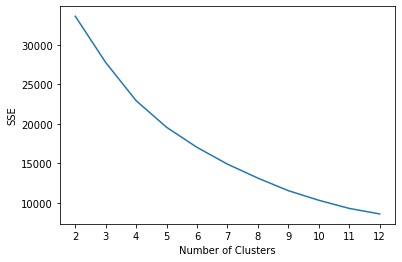

In [179]:
import matplotlib.pyplot as plt

_= plt.plot(range(2, 13), sse)
_= plt.xticks(range(2, 13))
_= plt.xlabel("Number of Clusters")
_= plt.ylabel("SSE")
_= plt.show()

This would give 4 or 5 clusters as ideal. (Where the steepness of SSE changes). Let's see how many clients per clusters:

In [180]:
kmeans = KMeans(init='k-means++', n_clusters = 4, n_init=30, random_state = 42)
kmeans.fit(scaled)
clusters = kmeans.predict(scaled)

pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['Client per cluster']).T

,1,0,2,3
Client per cluster,2640,1665,18,3


Let's try how does this look like of we omit the country.

In [202]:
aggregated = aggregated_df.drop(columns = ['Country'])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, columns_to_scale)])
rescaled = preprocessor.fit_transform(aggregated)

rescaled

array([[ 1.21875853, -0.90646672,  0.31418617, ...,  0.31727599,
        -0.0493501 ,  0.6957806 ],
       [ 1.1424116 , -0.17866513, -0.0425602 , ...,  0.45505247,
         0.31732189,  0.21468291],
       [-1.7333228 , -0.73697868, -0.09260607, ...,  0.03061203,
        -0.01375088, -0.04978014],
       ...,
       [-0.82564262, -0.84664741, -0.20612186, ..., -0.18494149,
        -0.19530691, -0.19889229],
       [ 0.96426876, -0.88652695,  0.02210093, ..., -0.14271967,
         0.02718823,  0.29064571],
       [-0.18093521, -0.49770144,  0.00183171, ..., -0.13160866,
        -0.09206917, -0.08072795]])

In [203]:
sse = []

for n_clusters in range(2,13):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state = 42)
    kmeans.fit(rescaled)
    sse.append(kmeans.inertia_)
    clusters = kmeans.predict(rescaled)
    silhouette_avg = silhouette_score(rescaled, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9542811786752483
For n_clusters = 3 The average silhouette_score is : 0.9034762234596765
For n_clusters = 4 The average silhouette_score is : 0.3110715557723851
For n_clusters = 5 The average silhouette_score is : 0.42423406883177367
For n_clusters = 6 The average silhouette_score is : 0.42422357967914587
For n_clusters = 7 The average silhouette_score is : 0.4339406213575059
For n_clusters = 8 The average silhouette_score is : 0.432768941813991
For n_clusters = 9 The average silhouette_score is : 0.43944542818828275
For n_clusters = 10 The average silhouette_score is : 0.4486071564891504
For n_clusters = 11 The average silhouette_score is : 0.4494693235319777
For n_clusters = 12 The average silhouette_score is : 0.4507586577777646


Looks like we get the same 4 clusters, so maybe the country did not play a particularly important role.

### 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [193]:
data = scaled.toarray()

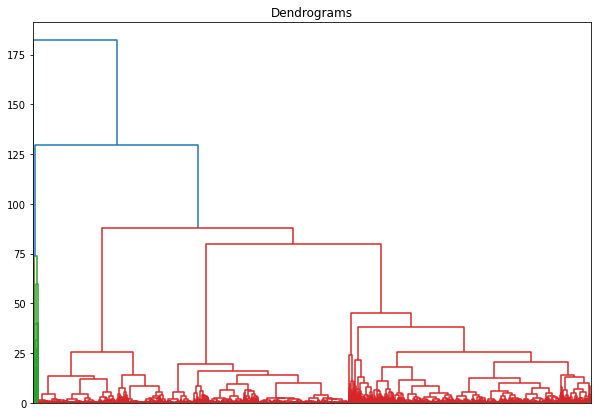

In [197]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'), no_labels = True)

If we decided to cut the tree at maximal distance, we would get two clusters, one very big and one very small. Instead I decided to cut around 60, which would give 3 big clusters and two very small clusters.

In [204]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(rescaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

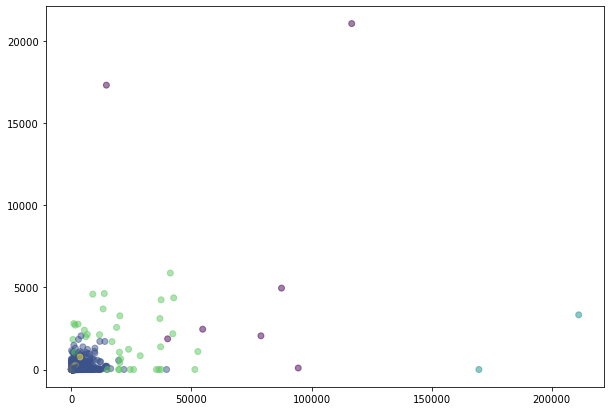

In [207]:
plt.figure(figsize=(10, 7))  
plt.scatter(aggregated['C0'], aggregated['C1'], c=cluster.labels_, alpha = 0.5) 

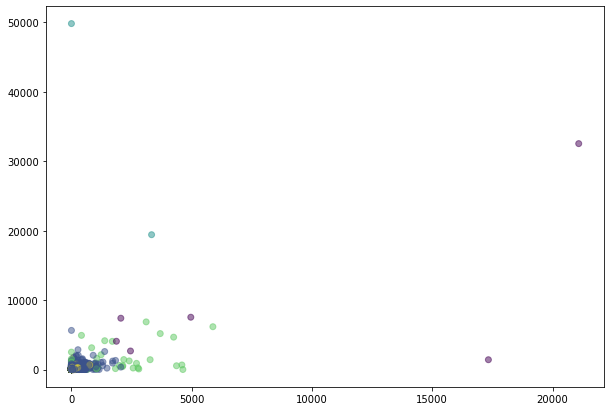

In [209]:
plt.figure(figsize=(10, 7))  
plt.scatter(aggregated['C1'], aggregated['C2'], c=cluster.labels_, alpha = 0.5) 

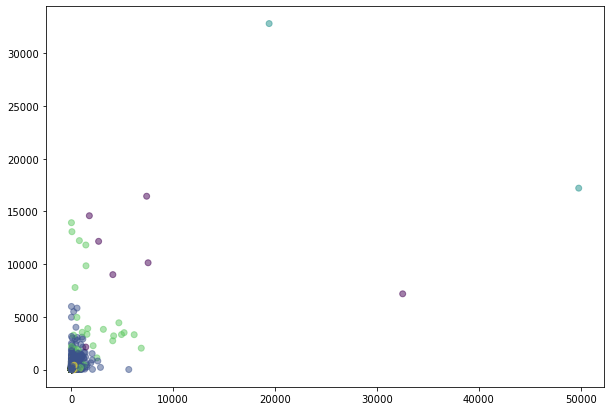

In [210]:
plt.figure(figsize=(10, 7))  
plt.scatter(aggregated['C2'], aggregated['C3'], c=cluster.labels_, alpha = 0.5) 

Looks like there is some separation if spendings per category are plotted assigned to these clusters.

### 6.	Compare the results of 4 and 5. Which approach do you think is best? Why?

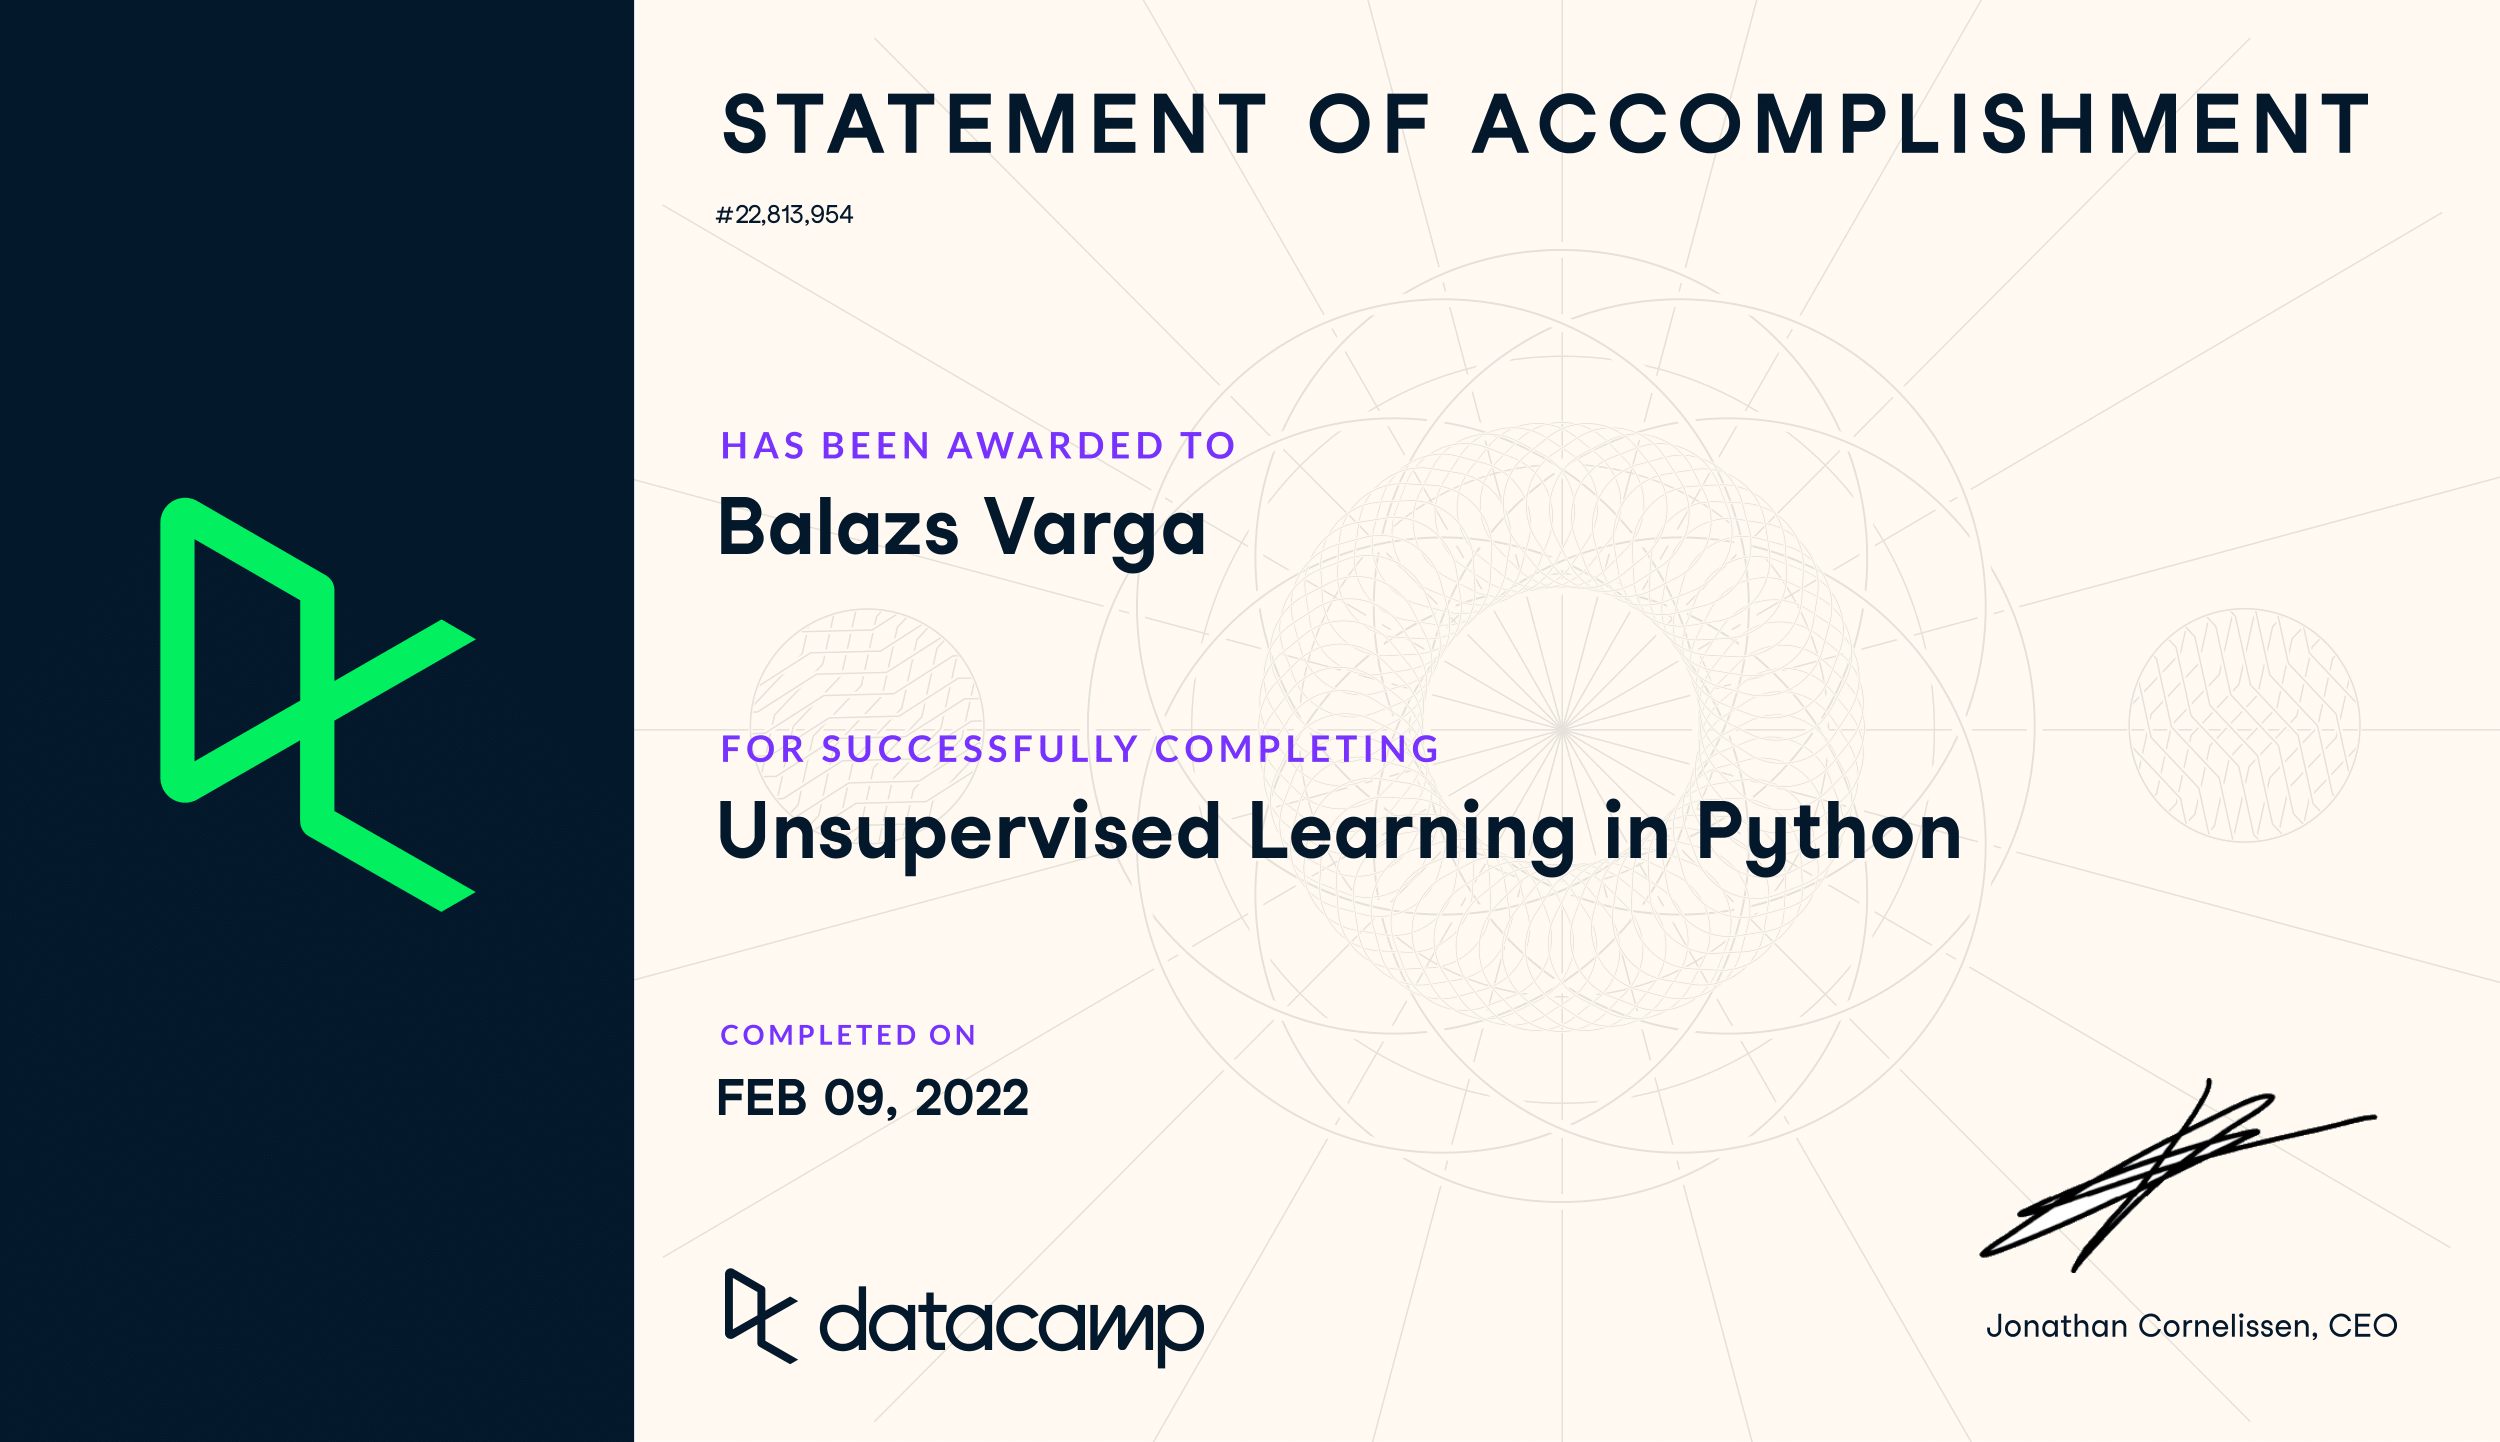